<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Project-Image Classification on CIFAR-10

**Applying Learned Concepts to a More Complex Dataset**

- Why CIFAR-10?

  -  The CIFAR-10 dataset is a challenging benchmark dataset for image classification. It contains 60,000 $32 \times 32$ color images across 10 classes (EX:airplane, car, bird, dog)
  - Unlike MNIST, CIFAR-10 involves more complex patterns and requires robust neural network architecture

**Building and Optimizing a Neural Network for Image Classification**

- Key Steps:
  
  - Preprocess the dataset for training (EX: normalization, one-hot encoding)

  - Define a neural network with convolutional layers for feature extraction
  
  - Optimize the network using techniques like learning rate adjustment and dropout

**Analyzing Model Performance and Experimenting with Hyperparameters**

- Performance Analysis

  - Evaluate accuracy and loss curves during training
  
  - Use test set metrics to measure generalization

- Experimentation

  - Try different activation functions (e.g., ReLU, Tanh).

  - Test optimizers like SGD, Adam, and RMSprop.

  - Adjust the learning rate and regularization techniques (EX: dropout, weight decay)

**Objective**
- Build, Train, and Optimize a Neural Network for CIFAR-10 image classification, experimenting with hyperparameters to improve perfomance

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 88ms/step - accuracy: 0.2141 - loss: 2.0764 - val_accuracy: 0.4527 - val_loss: 1.5650
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.3796 - loss: 1.6692 - val_accuracy: 0.5123 - val_loss: 1.3979
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.4308 - loss: 1.5412 - val_accuracy: 0.5497 - val_loss: 1.2992
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.4580 - loss: 1.4699 - val_accuracy: 0.5647 - val_loss: 1.2458
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 88ms/step - accuracy: 0.4878 - loss: 1.3992 - val_accuracy: 0.5878 - val_loss: 1.1871
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.5073 - loss: 1.3421 - val_accuracy: 0.6070 - val_loss: 1.1240
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.5155 - loss: 1.3134 - val_accuracy: 0.6003 - val_loss: 1.1483
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.5437 - loss: 1.2628 - 

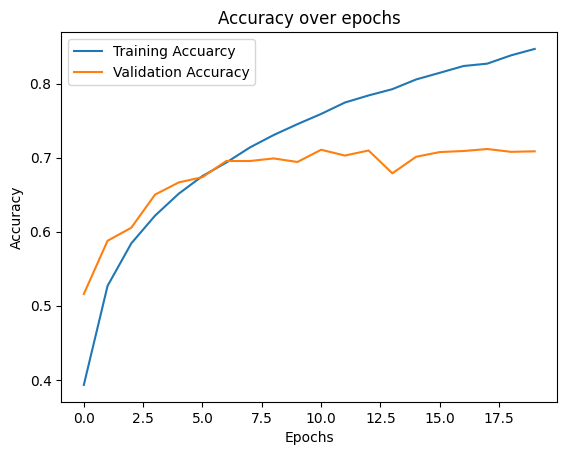

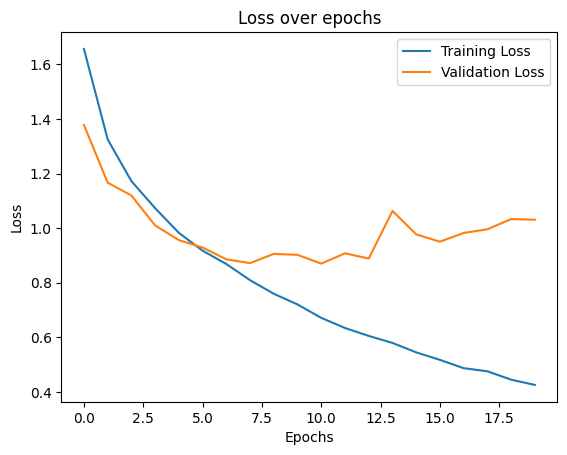

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Load CIFAR-10 Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# One-Hot Encoding target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Define the baseline model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Train the baseline model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    verbose=1
)

# Evaluate Baseline model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Baseline Model Test Accuracy:{accuracy:.4f}")

# Define an improved model
improved_model = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the improved model
improved_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the improved model
improved_history = improved_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    verbose=1
)

# Evaluate improved model
improved_loss, improved_accuracy = improved_model.evaluate(X_test, y_test, verbose=0)
print(f"Improved Model Test Accuracy:{improved_accuracy:.4f}")

# Plot training and validation accuracy
plt.plot(improved_history.history["accuracy"], label="Training Accuarcy")
plt.plot(improved_history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(improved_history.history["loss"], label="Training Loss")
plt.plot(improved_history.history["val_loss"], label="Validation Loss")
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()